In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
url =pd.read_csv(r"Downloads\MagicTelescope-1.csv")
en = preprocessing.LabelEncoder()
en.fit(['h','g'])
url.loc[:,'class'] = en.transform(url['class'])
names = url['class']
data = url.drop('class', axis = 'columns')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, names, test_size = 0.10)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
print('Accuracy score: ', classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred))

Accuracy score:  0.804416403785489
[[1123   84]
 [ 288  407]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1207
           1       0.83      0.59      0.69       695

    accuracy                           0.80      1902
   macro avg       0.81      0.76      0.77      1902
weighted avg       0.81      0.80      0.80      1902



<AxesSubplot:>

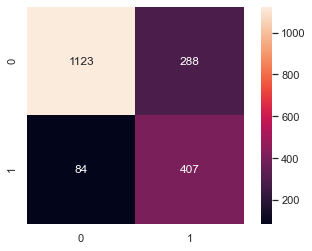

In [2]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns; sns.set()
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=True)

ROC 0.7580087379971747


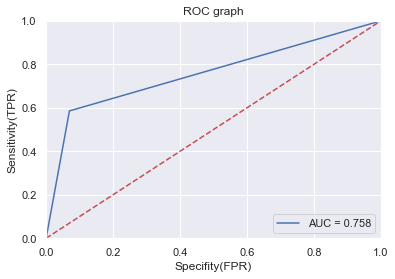

In [3]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc = auc(false_positive_rate, true_positive_rate)
print('ROC',roc)
plt.title('ROC graph')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.3f' %roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Sensitivity(TPR)')
plt.xlabel('Specifity(FPR)')
plt.show()

In [5]:
TP = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TN = matrix[1][1]
FP = FP.astype(float)
TP = TP.astype(float)
FN = FN.astype(float)
TN = TN.astype(float)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print("TPR" ,TPR)
print("FPR" ,FPR)

TPR 0.7958894401133948
FPR 0.1710794297352342
